In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression ,LinearRegression
from scipy import stats
from sklearn.pipeline import Pipeline
import seaborn as sns



In [59]:
Data_Needed = pd.read_csv('train.csv')

In [60]:
Test_Data = pd.read_csv('test.csv')

In [61]:
test_id = Test_Data['PassengerId']
test_id

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [62]:
Data_Needed 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [63]:
Data_Needed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [65]:
Data_Needed.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
Data_Needed['Sex'] = Data_Needed['Sex'].map({'male':0 , 'female':1})

In [67]:
Data_Needed['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [68]:
Data_Needed[['Age','Cabin','Embarked']].describe(include= 'all')


,Age,Cabin,Embarked
count,714.000000,204,889
unique,NaN,147,3
top,NaN,G6,S
freq,NaN,4,644
mean,29.699118,NaN,NaN
std,14.526497,NaN,NaN
min,0.420000,NaN,NaN
25%,20.125000,NaN,NaN
50%,28.000000,NaN,NaN
75%,38.000000,NaN,NaN


In [69]:
Data_Needed.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [70]:
Test_Data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [71]:
Data_Needed = Data_Needed.drop(columns= 'Cabin')

Test_Data = Test_Data.drop(columns='Cabin')


In [72]:
np.sort(stats.zscore(Data_Needed[['Fare']]))[-10:]

array([[-0.48944219],
       [-0.43667119],
       [-0.43700744],
       [-0.50647211],
       [-0.06199889],
       [-0.38667072],
       [-0.04438104],
       [-0.17626324],
       [-0.04438104],
       [-0.49237783]])

In [73]:
Data_Needed = Data_Needed.drop(columns= ['Ticket' , 'Name' , 'Pclass' ,'PassengerId']) 
Test_Data = Test_Data.drop(columns= ['Ticket' , 'Name' , 'Pclass'])
Test_Data.columns

Index(['PassengerId', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

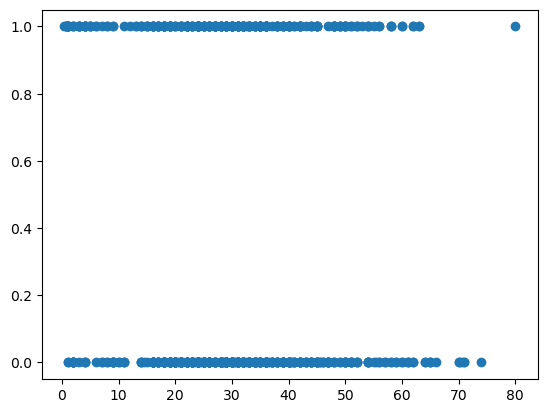

In [74]:
plt.scatter(Data_Needed['Age'], Data_Needed['Survived'])

In [75]:
Data_Needed['Survived'].sum()

np.int64(342)

<Axes: >

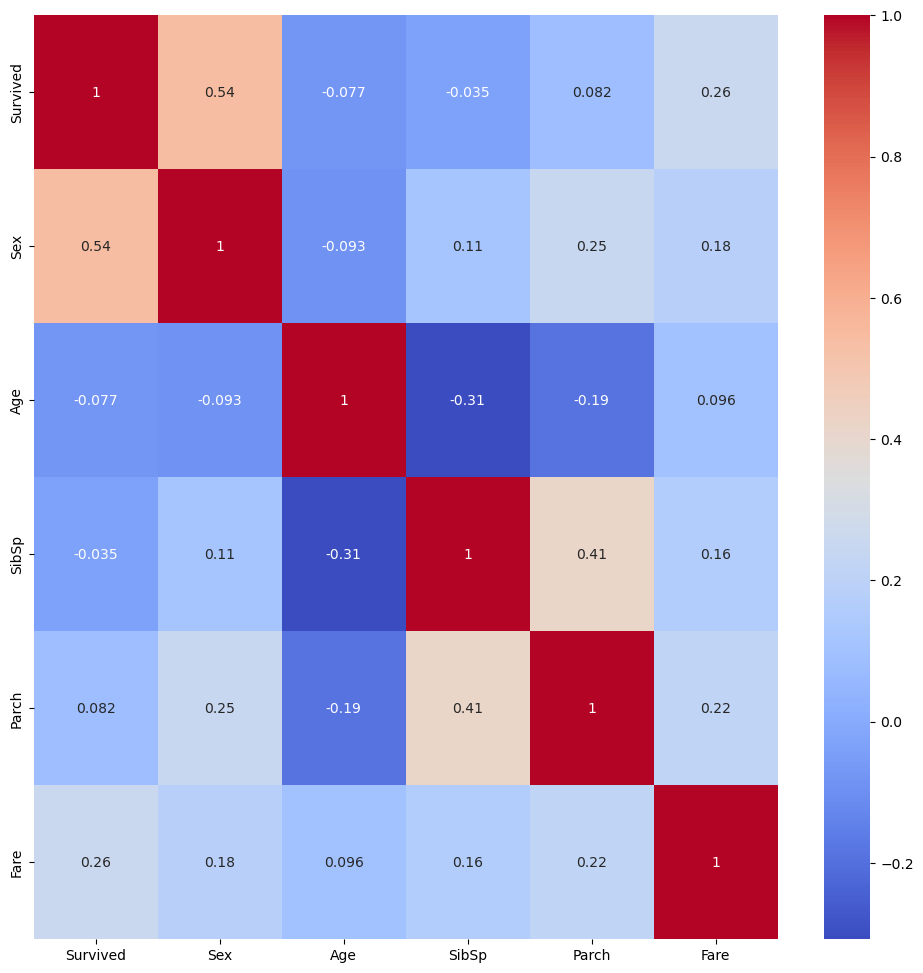

In [76]:
corr_matrix = Data_Needed.corr(numeric_only=True)
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix , annot=True , cmap='coolwarm')

In [77]:
sns.__dict__

{'__name__': 'seaborn',
 '__doc__': None,
 '__package__': 'seaborn',
 '__loader__': <_frozen_importlib_external.SourceFileLoader at 0x2914bbfbe30>,
 '__spec__': ModuleSpec(name='seaborn', loader=<_frozen_importlib_external.SourceFileLoader object at 0x000002914BBFBE30>, origin='d:\\uncategorized\\COMP_VISION\\anaconda\\Lib\\site-packages\\seaborn\\__init__.py', submodule_search_locations=['d:\\uncategorized\\COMP_VISION\\anaconda\\Lib\\site-packages\\seaborn']),
 '__path__': ['d:\\uncategorized\\COMP_VISION\\anaconda\\Lib\\site-packages\\seaborn'],
 '__file__': 'd:\\uncategorized\\COMP_VISION\\anaconda\\Lib\\site-packages\\seaborn\\__init__.py',
 '__cached__': 'd:\\uncategorized\\COMP_VISION\\anaconda\\Lib\\site-packages\\seaborn\\__pycache__\\__init__.cpython-313.pyc',
 '__builtins__': {'__name__': 'builtins',
  '__doc__': "Built-in functions, types, exceptions, and other objects.\n\nThis module provides direct access to all 'built-in'\nidentifiers of Python; for example, builtins.len

In [78]:
x = Data_Needed.drop(columns='Survived')
x

,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,22.0,1,0,7.2500,S
1,1,38.0,1,0,71.2833,C
2,1,26.0,0,0,7.9250,S
3,1,35.0,1,0,53.1000,S
4,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,S
887,1,19.0,0,0,30.0000,S
888,1,NaN,1,2,23.4500,S
889,0,26.0,0,0,30.0000,C


In [79]:
y = Data_Needed['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [80]:
x_train , x_test , y_train , y_test = train_test_split(x , y ,random_state= 11 ,test_size=0.2)

In [81]:
x_train['Embarked'] = x_train['Embarked'].fillna('S')
x_train.isna().sum()

Sex           0
Age         134
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [82]:
num_colmns = x_train.select_dtypes(include= ['int64', 'float64']).columns
num_colmns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [83]:
other_colmns = ['Embarked']
other_colmns



['Embarked']

In [84]:
x_train.isna().sum()

Sex           0
Age         134
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [85]:
x_test.isna().sum()

Sex          0
Age         43
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [86]:
Test_Data.isna().sum()

PassengerId     0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [87]:
Test_Data.isna().sum()

PassengerId     0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [88]:
num_imputer = SimpleImputer(strategy='most_frequent')

In [89]:
Pip_num = Pipeline(steps = [
('impute', num_imputer) ,
('scale', StandardScaler()),
])

In [90]:
pip_cat = Pipeline(steps = [
('ode',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [91]:
col_trans = ColumnTransformer(transformers=[
('num_handle', Pip_num , num_colmns),
('cat_handle', pip_cat , other_colmns),
],
remainder = 'passthrough',
n_jobs = -1)

In [92]:
last_pip = Pipeline(steps=[
('preprocessing',col_trans)
])

In [93]:
x_train = last_pip.fit_transform(x_train)

In [94]:
x_test = last_pip.transform(x_test)

In [95]:
lr = LogisticRegression()

In [96]:
x_test.shape


(179, 6)

In [97]:
lr.fit(x_train,y_train)

LogisticRegression()

In [98]:
lr.score(x_test,y_test)


0.8379888268156425

In [99]:
liner_reg = LinearRegression()

In [100]:
liner_reg.fit(x_train,y_train)

LinearRegression()

In [101]:
liner_reg.score(x_test,y_test)

0.4488471372168735

In [102]:
Test_Data['Sex'] = Test_Data['Sex'].map({'male':0 , 'female':1})

In [103]:
Test_Data = last_pip.transform(Test_Data)

In [104]:
submit = test_id.to_frame()
# why did i do that line ? as the test_id is already a part of a frame ?!?

In [105]:
submit

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [106]:
tst_pred =lr.predict(Test_Data)

In [107]:
submit['Survived'] = tst_pred

In [108]:
submit 

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [109]:
submit.drop(axis=1 , index= 0)

,PassengerId,Survived
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [111]:
submit.to_csv('gender_submission.csv' ,index=False)